In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import matplotlib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('红酒质量-已清洗.csv')

In [7]:
X = df.drop('quality', axis=1)
Y = df['quality']

In [9]:
Y = Y - 3

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))  # 6个类别（3-8）

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 3.9840 - accuracy: 0.2613 - val_loss: 1.5076 - val_accuracy: 0.5181
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2662 - accuracy: 0.4945 - val_loss: 1.2708 - val_accuracy: 0.5020
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1748 - accuracy: 0.4774 - val_loss: 1.2164 - val_accuracy: 0.5341
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1562 - accuracy: 0.4925 - val_loss: 1.2103 - val_accuracy: 0.5422
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1341 - accuracy: 0.4965 - val_loss: 1.1890 - val_accuracy: 0.5341
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1195 - accuracy: 0.4724 - val_loss: 1.1935 - val_accuracy: 0.4940
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1205 - accuracy: 0.5045 - val_loss: 1.1746 - val_accuracy: 0.5382
Epoch 8/100
3

In [25]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题plt.figure(figsize=(10, 7))

10/10 [==============================] - 0s 783us/step


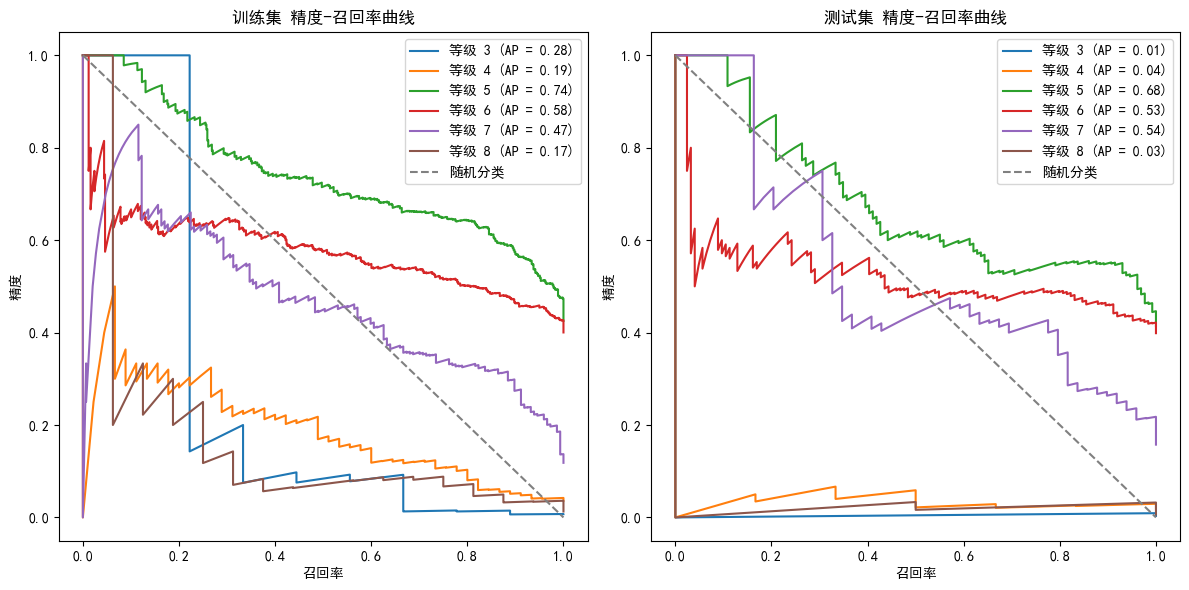

In [27]:
Y_train_probs = model.predict(X_train)
Y_test_probs = model.predict(X_test)

# 获取唯一类别标签
unique_classes_train = np.unique(Y_train)
unique_classes_test = np.unique(Y_test)

# 设置图形大小和子图的排列 (1 行 2 列)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 绘制训练集的精度-召回率曲线
for i in unique_classes_train:
    precision, recall, _ = precision_recall_curve(Y_train == i, Y_train_probs[:, i])
    average_precision = average_precision_score(Y_train == i, Y_train_probs[:, i])
    ax[0].plot(recall, precision, label=f'等级 {i+3} (AP = {average_precision:.2f})')

# 绘制测试集的精度-召回率曲线
for i in unique_classes_test:
    precision, recall, _ = precision_recall_curve(Y_test == i, Y_test_probs[:, i])
    average_precision = average_precision_score(Y_test == i, Y_test_probs[:, i])
    ax[1].plot(recall, precision, label=f'等级 {i+3} (AP = {average_precision:.2f})')

# 在两个子图中分别绘制随机分类器的对角线
ax[0].plot([0, 1], [1, 0], linestyle='--', color='gray', label='随机分类')
ax[1].plot([0, 1], [1, 0], linestyle='--', color='gray', label='随机分类')

# 设置标题、标签和图例
ax[0].set_title('训练集 精度-召回率曲线')
ax[0].set_xlabel('召回率')
ax[0].set_ylabel('精度')
ax[0].legend(loc='best')

ax[1].set_title('测试集 精度-召回率曲线')
ax[1].set_xlabel('召回率')
ax[1].set_ylabel('精度')
ax[1].legend(loc='best')

# 保存并显示图形
plt.tight_layout()
plt.savefig("red_wine_quality_precision_recall_curve.png", dpi=300, bbox_inches='tight') 
plt.show()